# 读入数据


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import nan as NaN
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb
import catboost as cat
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from math import sqrt
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from itertools import combinations
from sklearn.model_selection import train_test_split
import joblib
import warnings
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt



data_train = pd.read_excel('C://Users//aw//Desktop//月报模板//12.xlsx')
#data_store_test = pd.read_excel('F://销售额预测//test.xlsx')



#处理V2数据
mean_rent_by_market = data_train.groupby('V4')['V2'].mean()

# 对V2数据为0的行进行填充
data_train.loc[data_train['V2'] == 0, 'V2'] = data_train[data_train['V2'] == 0]['V4'].map(mean_rent_by_market)


# 数据初步探索

### 主要探索以下数值 
- 异常值
- 缺失值



In [2]:
data_train.drop(data_train[data_train['LABEL']< 1000000].index ,inplace  = True)
data_train.drop(data_train[data_train['V6']== 0].index ,inplace  = True)
data_train.drop(data_train[data_train['V7']== 0].index ,inplace  = True)
data_train.dropna(inplace  = True)
data_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 481
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      449 non-null    int64  
 1   V1      449 non-null    int64  
 2   V2      449 non-null    float64
 3   V3      449 non-null    int64  
 4   V4      449 non-null    int64  
 5   Q1      449 non-null    object 
 6   Q2      449 non-null    object 
 7   Q3      449 non-null    object 
 8   V5      449 non-null    int64  
 9   V6      449 non-null    float64
 10  V7      449 non-null    int64  
 11  LABEL   449 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 45.6+ KB


# 绘制数据图像

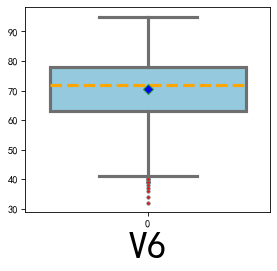

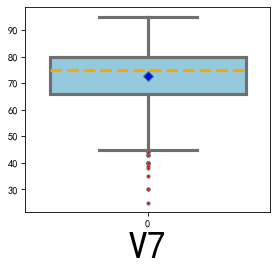

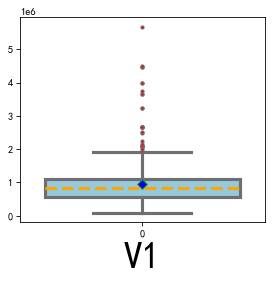

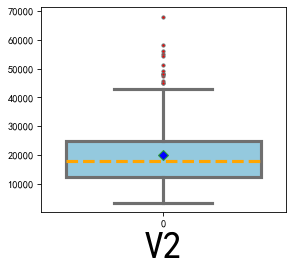

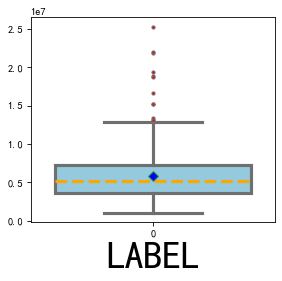

In [3]:
plt.rcParams['font.sans-serif']=['SimHei']
column = ['V6', 'V7','V1','V2','LABEL']
#fig = plt.figure(figsize = (80,60),dpi = 75)
#column = data_store.columns.tolist(a)
for i in range(len(column)):
    fig = plt.figure(figsize = (80,60),dpi = 75)
    plt.subplot(14,16,i + 1)
    sns.boxplot(
        data=data_train.loc[:, column[i]],
        linewidth=3,
        color='skyblue',
        showmeans=True, # 以点的形式显示均值
        flierprops = {'marker':'o','markerfacecolor':'red', 'markersize':3},
        meanprops = {'marker':'D','markerfacecolor':'blue', 'markersize':7},
        medianprops = {'linestyle':'--','color':'orange'},
    )
    #sns.boxplot(data_store[a[i]],width=0.5)
    plt.xlabel(column[i],fontsize=36)
    plt.show()

# 剔除异常值，并处理成正太分布

### 使用box-cox进行数据变换

In [4]:
for col in ['V6', 'V7','V1','V2','LABEL']:
    q1, q3 = data_train[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    data_train = data_train[(data_train[col] >= lower_bound) & (data_train[col] <= upper_bound)]

C:\Users\aw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


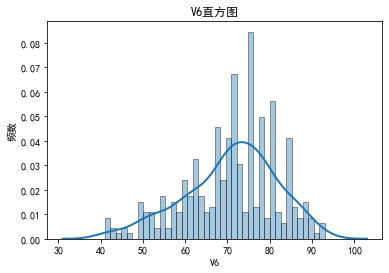

C:\Users\aw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


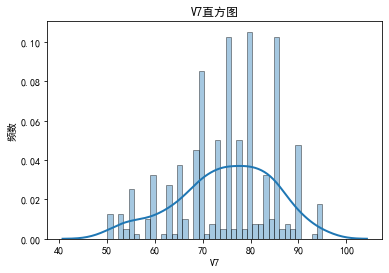

C:\Users\aw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\aw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


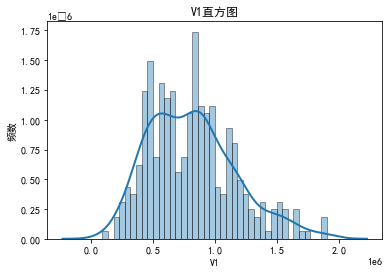

C:\Users\aw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


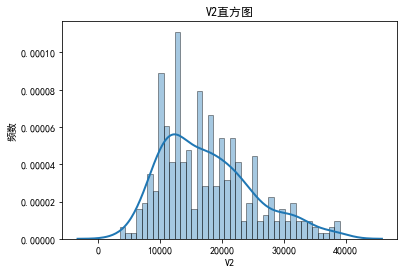

C:\Users\aw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\aw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


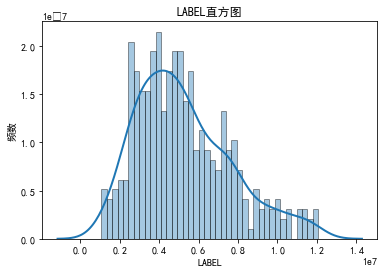

In [5]:
# 读入数据
#data = pd.read_csv('data.csv')

# 绘制直方图
for col in ['V6', 'V7','V1','V2','LABEL']:
    sns.distplot(data_train[col], kde=True, bins=40, hist_kws={"edgecolor": 'black'}, kde_kws={"lw": 2})
    # 添加标题和坐标轴标签
    plt.title('{}直方图'.format(col))
    plt.xlabel('{}'.format(col))
    plt.ylabel('频数')
    plt.show()

In [6]:
'''for col in ['V6分', 'V7','V1','V2']:
    # 进行Box-Cox变换
    data_train[col], _ = stats.boxcox(data_train[col]) 
    data_test[col], _ = stats.boxcox(data_test[col]) 
    fig = plt.figure(figsize = (80,60),dpi = 75)
    plt.subplot(14,15,i + 1)
    sns.distplot(data_train[col], fit=norm)
    #(mu, sigma) = norm.fit(data_train[col])
    #print("mu = {:.2f}, sigma {:.2f}".format(mu, sigma))
    #plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best')
    plt.ylabel('Frequency')
    plt.title(col)
    plt.show() '''

'for col in [\'V6分\', \'V7\',\'V1\',\'V2\']:\n    # 进行Box-Cox变换\n    data_train[col], _ = stats.boxcox(data_train[col]) \n    data_test[col], _ = stats.boxcox(data_test[col]) \n    fig = plt.figure(figsize = (80,60),dpi = 75)\n    plt.subplot(14,15,i + 1)\n    sns.distplot(data_train[col], fit=norm)\n    #(mu, sigma) = norm.fit(data_train[col])\n    #print("mu = {:.2f}, sigma {:.2f}".format(mu, sigma))\n    #plt.legend([\'Normal dist. ($\\mu=$ {:.2f} and $\\sigma=$ {:.2f})\'.format(mu, sigma)], loc=\'best\')\n    plt.ylabel(\'Frequency\')\n    plt.title(col)\n    plt.show() '

# 处理开业一年后业绩

In [7]:
data_train

,ID,V1,V2,V3,V4,Q1,Q2,Q3,V5,V6,V7,LABEL
3,4,831113,11236.000000,2,3,东区,江苏大区,苏锡常,2,51.0,85,5415572
5,6,1151313,22000.000000,2,5,北区,京津冀,VI1,3,90.0,58,5582909
6,7,613015,9900.000000,5,6,北区,山东大区,鲁西南,2,73.0,85,5513529
9,10,1874930,15791.666667,2,1,华中,安徽大区,皖中豫南,2,73.0,70,11518702
10,11,828189,16036.000000,5,5,西区,川渝西北,川东区,2,59.0,70,3474821
...,...,...,...,...,...,...,...,...,...,...,...,...
475,476,450949,11000.000000,5,4,华中,安徽大区,皖南区,2,44.0,80,7312148
476,477,1247807,10000.000000,4,6,华中,河南大区,VI1,3,86.0,71,2694650
479,480,1640000,13200.000000,3,1,北区,山东大区,鲁西区,2,78.0,90,5354521
480,481,1198830,16000.000000,4,6,华中,安徽大区,皖北区,3,85.0,85,4699274


In [8]:
#data_train['开业一年后业绩'] = np.log(data_train['开业一年后业绩'])

# 特征衍生（特征交叉）&（高维交叉）

In [11]:
con_col = ['V1','V6','V7','V2']


all_f = ['V1','V6','V7','V2']

for df in [data_train]:
    for col in all_f:
        df[f'{col}_log'] = df[col].apply(lambda x: int(np.log(x)) if x > 0 else 0)
        
# 特征交叉        
log_f = ['V1','V6','V7','V2']

for df in [data_train]:
    for i in range(len(log_f)):
        for j in range(i + 1, len(log_f)):
            df[f'{log_f[i]}_{log_f[j]}'] = df[log_f[i]]*10000 + df[log_f[j]]









#特征衍生（特征交叉）    
def feature_cross_2oder(fea_dataframe , tar_list):
    n = len(tar_list)
    for fir in range(n):
        for sec in range(fir+1,n):
            A = tar_list[fir]
            B = tar_list[sec]
            fea_dataframe[A+'_'+ B +'_sum'] = fea_dataframe[A] + fea_dataframe[B]
            fea_dataframe[A+'_'+ B +'_diff'] = fea_dataframe[A] - fea_dataframe[B]
            fea_dataframe[A+'_'+ B +'_mul'] = fea_dataframe[A] * fea_dataframe[B]
            fea_dataframe[A+'_'+ B +'_ratio'] = fea_dataframe[A] / (fea_dataframe[B] + 1e-3)
            
feature_cross_2oder(data_train,con_col)




#特征衍生（高维交叉）   
def feature_cross_highoder(fea_high_data , high_list):
    N = len(high_list)
    for ksize in range(3,N+1):
        cur_list = list(combinations (high_list ,ksize))
        for tmp_small in cur_list:
            name_str = ''
            tmp_dataframe = pd.DataFrame({'sum_df':[0]*fea_high_data.shape[0],'mul_df':[1]*fea_high_data.shape[0]})
            for meta in tmp_small:
                name_str = name_str + meta + '_'
                tmp_dataframe['sum_df'] = tmp_dataframe['sum_df'] + data_train[meta]
                tmp_dataframe['mul_df'] = tmp_dataframe['mul_df'] * data_train[meta]
                data_train['sum_'+name_str] = tmp_dataframe['sum_df']
                data_train['mul_'+name_str] = tmp_dataframe['mul_df']
            

feature_cross_highoder(data_train,con_col)

# 特征编码

In [12]:
catego_col = ['Q1','Q2','Q3']
enc = LabelEncoder()
for cate in catego_col:
    lb = LabelEncoder()
    lb.fit(data_train[col])
    data_train[cate] = enc.fit_transform(data_train[cate])

In [13]:
data_train

,ID,V1,V2,V3,V4,Q1,Q2,Q3,V5,V6,...,sum_V1_V7_V2_,mul_V1_V7_V2_,sum_V6_,mul_V6_,sum_V6_V7_,mul_V6_V7_,sum_V6_V7_V2_,mul_V6_V7_V2_,sum_V1_V6_V7_V2_,mul_V1_V6_V7_V2_
3,4,831113,11236.000000,2,3,0,6,28,2,51.0,...,8.424340e+05,7.937628e+11,51.0,51.0,136.0,4335.0,11372.000000,4.870806e+07,8.424850e+05,4.048190e+13
5,6,1151313,22000.000000,2,5,1,2,0,3,90.0,...,1.173371e+06,1.469075e+12,90.0,90.0,148.0,5220.0,22148.000000,1.148400e+08,1.173461e+06,1.322168e+14
6,7,613015,9900.000000,5,6,1,4,42,2,73.0,...,6.230000e+05,5.158521e+11,73.0,73.0,158.0,6205.0,10058.000000,6.142950e+07,6.230730e+05,3.765720e+13
9,10,1874930,15791.666667,2,1,2,3,19,2,73.0,...,1.890792e+06,2.072579e+12,73.0,73.0,143.0,5110.0,15934.666667,8.069542e+07,1.890865e+06,1.512983e+14
10,11,828189,16036.000000,5,5,4,5,8,2,59.0,...,8.442950e+05,9.296587e+11,59.0,59.0,129.0,4130.0,16165.000000,6.622868e+07,8.443540e+05,5.484986e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,476,450949,11000.000000,5,4,2,3,21,2,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
476,477,1247807,10000.000000,4,6,2,8,0,3,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
479,480,1640000,13200.000000,3,1,1,4,41,2,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480,481,1198830,16000.000000,4,6,2,3,20,3,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# 特征筛选降维
L1 = data_train['LABEL']
data_train = data_train.drop(['LABEL'],axis=1)
feat_labels = data_train.columns

def select_fea(label):
    X = data_train.values
    y = label.values
    # X,test_data_X,y,test_data_Y = train_test_split(FeatureEngineer_df,df['出水总氮'],test_size=0.2,random_state=1010)
    # fit model no training data
    select_model = XGBRegressor()
    select_model.fit(X , y)
    # feature importance

    importances = select_model.feature_importances_
    indices = np.argsort(importances)[::-1] # 取反后是从大到小
    reserve_feature_list = []
    for i in range(X.shape[1]):
        # if importances[indices[i]] >= 0.001:
        if len(reserve_feature_list) < 100:
            reserve_feature_list.append(feat_labels[indices[i]])
        else:
            break
        # print("%2d) %-*s %f" % (i + 1, 30, feat_labels[indices[i]], importances[indices[i]]))
    print(reserve_feature_list)
    return reserve_feature_list
    


cut_fea1 = list(set(feat_labels) - set(select_fea(L1)))
data_store_pred_sales_train = data_train.drop(cut_fea1,axis=1)

['V4', 'V1_V2_mul', 'mul_V1_V6_V7_V2_', 'mul_V1_V6_V2_', 'mul_V1_V6_', 'mul_V6_V7_', 'mul_V6_V7_V2_', 'sum_V6_V7_', 'V7_V2_mul', 'mul_V1_V6_V7_', 'V1_V7_mul', 'Q3', 'V6_V2_sum', 'V6_V7_mul', 'V6_V7_sum', 'V1_V7_ratio', 'V6_V2_mul', 'mul_V1_V7_V2_', 'V6_V7_ratio', 'Q2', 'V6_V2', 'V1_V6_sum', 'Q1', 'sum_V6_V7_V2_', 'V7_V2_ratio', 'V1_V6_mul', 'V6_V2_ratio', 'V3', 'V1_V2_ratio', 'sum_V1_', 'V7_V2', 'V5', 'V7', 'mul_V1_V7_', 'V7_V2_sum', 'ID', 'sum_V6_', 'V2', 'V6_V7_diff', 'V1_V6_ratio', 'V6_V2_diff', 'V6', 'V1', 'V1_V2_diff', 'V6_V7', 'V7_V2_diff', 'sum_V1_V6_V2_', 'V1_V2_sum', 'sum_V1_V6_', 'mul_V1_', 'sum_V1_V6_V7_V2_', 'mul_V6_', 'sum_V1_V7_V2_', 'sum_V1_V7_', 'V1_log', 'V1_V6_diff', 'V6_log', 'V7_log', 'V2_log', 'V1_V6', 'V1_V7', 'V1_V7_diff', 'V1_V7_sum', 'sum_V1_V6_V7_', 'V1_V2']


In [15]:
data_store_pred_sales_train = data_store_pred_sales_train.reset_index(drop=True)
L1 = L1.reset_index(drop=True)

In [16]:
def cut_train_test(D1,D2):
    train_data_X,test_data_X,train_data_Y,test_data_Y = train_test_split(D1,D2,test_size=0.2,random_state=1010)
    train_data_X.reset_index(drop=True, inplace=True)
    test_data_X.reset_index(drop=True, inplace=True)
    train_data_Y.reset_index(drop=True, inplace=True)
    test_data_Y.reset_index(drop=True, inplace=True)
#     X_train = train_data_X.values  #Creates an array of the train data
#     X_test = test_data_X.values  #Creates an array of the test data
#     Y_train = train_data_Y.values 
#     Y_test = test_data_Y.values
#     return X_train,X_test,Y_train,Y_test
    return train_data_X,test_data_X,train_data_Y,test_data_Y


train_data_X,test_data_X,train_data_Y,Y_test = cut_train_test(data_store_pred_sales_train,L1)

In [17]:
def lgb_model(clf, train_x, train_y, test_x):
    folds = 5
    seed = 2222
    kf = KFold(n_splits=folds, shuffle=True, random_state=seed)
    # cv_val_pred = np.zeros(train_x.shape[0])
    # cv_scores = []
    test_pre = []

    for i, (train_index, valid_index) in enumerate(kf.split(train_x, train_y)):
        print('************************************ {} ************************************'.format(str(i + 1)))
        trn_x, trn_y, val_x, val_y = train_x.iloc[train_index], train_y[train_index], train_x.iloc[valid_index], \
                                     train_y[valid_index]

        train_matrix = clf.Dataset(trn_x, label=trn_y)
        valid_matrix = clf.Dataset(val_x, label=val_y)

        params = {
            'learning_rate': 0.03,
            'boosting_type': 'gbdt',
            'objective': 'mse',
            'metric': 'mse',
            'verbose': -1,
            'seed': 2020,
            'n_jobs': -1,
            'max_depth': -1,
            'min_child_weight': 4,
            'num_leaves': 2 ** 4,
            'feature_fraction': 0.8,
            'bagging_fraction': 0.8,
            'bagging_freq': 4,
        }

        model_lgb = clf.train(params, train_matrix, num_boost_round=20000, valid_sets=[train_matrix, valid_matrix],
                          categorical_feature=[], verbose_eval=1000, early_stopping_rounds=200)


        # 模型保存
        load_name = 'lgbcv'+ str(i+1) +'.pkl'
        joblib.dump(model_lgb,load_name)

        # 预测
        # val_pred = model_lgb.predict(val_x, num_iteration=model_lgb.best_iteration)
        test_pred = model_lgb.predict(test_x, num_iteration=model_lgb.best_iteration)
        test_pre.append(test_pred)
        print(list(sorted(zip(train_x.columns.tolist(), model_lgb.feature_importance()), key=lambda x: x[1], reverse=True))[
              :20])

        # cv_val_pred[valid_index] = val_pred
    #     cv_scores.append(np.sqrt(mean_squared_error(np.expm1(val_y), np.expm1(val_pred))))
    #     #         cv_scores.append(mean_squared_error(val_y, val_pred))
    #     print(cv_scores)
    #
    # print("s_scotrainre_list:", cv_scores)
    # print("s_score_mean:", np.mean(cv_scores))
    # print("s_score_std:", np.std(cv_scores))
    cv_pred = sum(test_pre) / folds

    # return cv_val_pred, cv_pred, np.mean(cv_scores)
    return cv_pred



In [18]:
pred_lgb = lgb_model(lgb, train_data_X, train_data_Y, test_data_X)
model = joblib.load('lgbcv1.pkl')
print('***********************************************************************************************')
print('***********************************************************************************************')
print('***********************************************************************************************')
print("rmse:", sqrt(mean_squared_error(Y_test, pred_lgb)))
print("\nR方_socre为：", r2_score(Y_test, pred_lgb))

************************************ 1 ************************************
Training until validation scores don't improve for 200 rounds


C:\Users\aw\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\aw\anaconda3\lib\site-packages\lightgbm\basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
C:\Users\aw\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Early stopping, best iteration is:
[90]	training's l2: 2.28611e+12	valid_1's l2: 3.47352e+12
[('V4', 55), ('Q3', 38), ('V1_V2_mul', 23), ('V7_V2_mul', 23), ('V1_V6_mul', 21), ('V6_V7_sum', 20), ('Q2', 19), ('mul_V1_V6_V2_', 18), ('mul_V1_V6_V7_V2_', 17), ('V1_V7_mul', 16), ('V1_V7_ratio', 15), ('V6_V7_mul', 15), ('V6_V7_ratio', 15), ('ID', 14), ('V6_V2', 14), ('Q1', 13), ('V7_V2_ratio', 13), ('V1', 12), ('V1_V2_ratio', 12), ('V6_V7_diff', 12)]
************************************ 2 ************************************
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[49]	training's l2: 2.95737e+12	valid_1's l2: 3.47896e+12
[('V4', 48), ('V6_V2', 18), ('mul_V1_V6_', 17), ('V1_V2_mul', 13), ('V1_V7_mul', 12), ('Q3', 11), ('V1_V6_ratio', 11), ('V1_V2_ratio', 11), ('mul_V6_V7_V2_', 11), ('mul_V1_V6_V7_', 10), ('V6_V7_ratio', 8), ('V1_V6_mul', 7), ('mul_V1_V6_V2_', 7), ('mul_V1_V7_V2_', 7), ('mul_V1_V6_V7_V2_', 7), ('V2', 6), ('V7_V2', 6), ('V